In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, numpy as np

sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

In [4]:
csv_list = sorted(glob.glob('modis_20[1-9][0-9]_China.csv'))
use_cols = ['latitude','longitude','acq_date','confidence']
fires = pd.concat(
    (pd.read_csv(f, usecols=use_cols, parse_dates=['acq_date']) for f in csv_list),
    ignore_index=True
)

fires['year'] = fires['acq_date'].dt.year
fires['doy']  = fires['acq_date'].dt.dayofyear
fires['week'] = fires['acq_date'].dt.week
print('合并完成，总行数：', fires.shape[0])

合并完成，总行数： 1073119


In [5]:
LAT_MIN, LAT_MAX = 43.5, 53.5
LON_MIN, LON_MAX = 121.0, 135.0
hlj_fires = fires.query('@LAT_MIN <= latitude <= @LAT_MAX and @LON_MIN <= longitude <= @LON_MAX').copy()
print('黑龙江范围内火点：', hlj_fires.shape[0])

黑龙江范围内火点： 289555


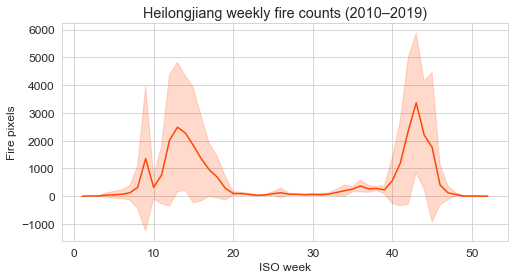

Hottest Week: No. 45 week


In [13]:
weekly = hlj_fires.groupby(['year','week']).size().reset_index(name='count')
plt.figure(figsize=(8,4))
sns.lineplot(data=weekly, x='week', y='count', ci='sd', color='orangered')
plt.title('Heilongjiang weekly fire counts (2010–2019)')
plt.ylabel('Fire pixels'); plt.xlabel('ISO week'); plt.show()

peak_week = weekly.loc[weekly['count'].idxmax(), 'week']
print('Hottest Week: No.', int(peak_week), 'week')

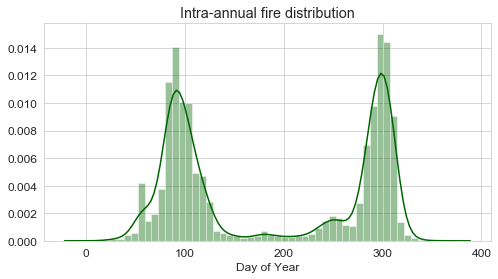

In [10]:
plt.figure(figsize=(8,4))
sns.distplot(hlj_fires['doy'], bins=52, kde=True, color='darkgreen')
plt.title('Intra-annual fire distribution')
plt.xlabel('Day of Year')
plt.show()

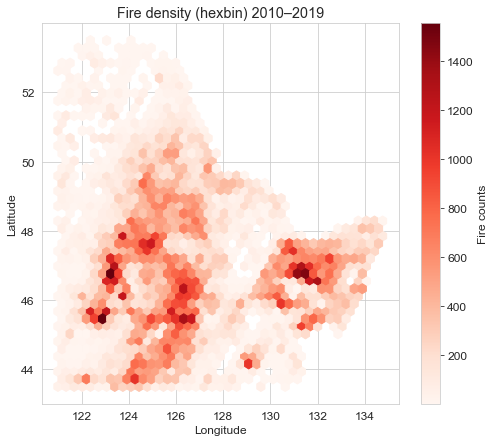

In [11]:
plt.figure(figsize=(8,7))
plt.hexbin(hlj_fires['longitude'], hlj_fires['latitude'],
           gridsize=40, cmap='Reds', mincnt=1)
plt.colorbar(label='Fire counts')
plt.title('Fire density (hexbin) 2010–2019')
plt.xlabel('Longitude'); plt.ylabel('Latitude'); plt.show()

In [14]:
hlj_fires.to_csv('hlj_fires_2010_2019.csv', index=False)
print('The file hlj_fires_2010_2019.csv has been saved for subsequent tasks.')

The file hlj_fires_2010_2019.csv has been saved for subsequent tasks.
